In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import io
import requests
import matplotlib.collections as col
import matplotlib.patches as mpatches
#import cartopy
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#from cartopy.feature import ShapelyFeature
#import cartopy.io.shapereader as shpreader
import seaborn as sns
#import shapefile as shp
import math

In [3]:
#Option a: geopandas - looks like it has what i need
#option b: cartopy: Working but was built for geographical not state maps
#option c: geoplot

In [8]:
allPolls = pd.read_csv('all_polls.csv')

In [9]:
allPolls.columns

Index(['Unnamed: 0', 'pollno', 'race', 'year', 'location', 'type_simple',
       'type_detail', 'pollster', 'partisan', 'polldate', 'samplesize',
       'cand1_name', 'cand1_pct', 'cand2_name', 'cand2_pct', 'cand3_pct',
       'margin_poll', 'electiondate', 'cand1_actual', 'cand2_actual',
       'margin_actual', 'error', 'bias', 'polldistance', 'rightcall',
       'comment', 'methodology', 'state', 'partisan_race'],
      dtype='object')

In [11]:
np.min(allPolls.year)

1998

In [10]:
pollsterRatings = pd.read_csv('pollster_ratings.csv')

In [11]:
pollsterRatings = pollsterRatings.set_index('Pollster').transpose()

In [12]:
for index in range(len(allPolls)):
    pollMethodology = allPolls['methodology'][index]
    #If the listed methodology for this poll is nan:
    if pollMethodology != pollMethodology:
        pollsterName = allPolls['pollster'][index]
        #If this pollster has a listed rating:
        if pollsterName in pollsterRatings:
            #Set this poll's methodology
            allPolls['methodology'][index] = str(pollsterRatings[pollsterName][4])

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
print(allPolls['methodology'][3] != allPolls['methodology'][3], allPolls['methodology'][3])
print(allPolls['methodology'][7] != allPolls['methodology'][7], allPolls['methodology'][7])

False IVR/Online
False Live


In [14]:
pollsterRatings['SurveyMonkey'][4]

'Online'

In [15]:
allPolls.head(10)

Unnamed: 0    pollno               race  year location type_simple  \
0           0     52636  2018_House-G_WV-1  2018     WV-1     House-G   
1           1   5385987  2012_House-G_NM-2  2012     NM-2     House-G   
2           2  15380988     2016_Pres-R_VT  2016       VT      Pres-P   
3           3     56204  2018_House-G_NV-1  2018     NV-1     House-G   
4           4  15381069     2016_Pres-D_KS  2016       KS      Pres-P   
5           5     52621      2018-Gov-G_PA  2018       PA       Gov-G   
6           6     56202  2018_House-G_UT-1  2018     UT-1     House-G   
7           7  15381190     2016_Pres-D_MO  2016       MO      Pres-P   
8           8     52795  2018_House-G_UT-2  2018     UT-2     House-G   
9           9   5385988  2012_House-G_NM-3  2012     NM-3     House-G   

  type_detail                     pollster partisan    polldate  ...  \
0     House-G          Monmouth University      NaN   6/14/2018  ...   
1     House-G      Research & Polling Inc.      NaN  10/24/2012  ...   
2      Pres-R         Castleton University      NaN   2/10/2016  ...   
3     House-G              Emerson College      NaN  10/10/2018  ...   
4      Pres-D   Fort Hays State University      NaN   2/23/2016  ...   
5       Gov-G  Franklin & Marshall College      NaN   3/19/2018  ...   
6     House-G           University of Utah      NaN   10/3/2018  ...   
7      Pres-D   Fort Hays State University      NaN    3/7/2016  ...   
8     House-G           University of Utah      NaN   6/11/2018  ...   
9     House-G      Research & Polling Inc.      NaN  10/24/2012  ...   

   cand2_actual margin_actual  error   bias  polldistance  rightcall  comment  \
0         64.60        -29.20  16.80 -16.80           145        NaN      NaN   
1         59.06        -18.19   0.19   0.19            13        1.0      NaN   
2         30.17          2.35  16.75    NaN            20        1.0      NaN   
3         30.90         35.30   5.10  -5.10            27        NaN      NaN   
4         32.25         35.50  45.50    NaN            11        0.0      NaN   
5         40.70         17.10   0.10  -0.10           232        NaN      NaN   
6         61.60        -36.70   4.70   4.70            34        NaN      NaN   
7         49.36          0.25   6.75    NaN             8        1.0      NaN   
8         56.10        -17.20   6.80  -6.80           148        NaN      NaN   
9         36.88         26.24   8.24  -8.24            13        1.0      NaN   

   methodology  state  partisan_race  
0         Live     WV              1  
1         Live     NM              1  
2         Live     VT              0  
3   IVR/Online     NV              1  
4         Live     KS              0  
5  Online/Live     PA              1  
6          NaN     UT              1  
7         Live     MO              0  
8          NaN     UT              1  
9         Live     NM              1  

[10 rows x 29 columns]

In [16]:
#All the republicans and democrats we replace with generic 'DEM', 'REP' titles
dem_replace = ['Democrat', 'Clinton', 'Dean', 'Kerry', 'Obama', 'Gore', 'Bradley', 'Edwards', 'Clark']
rep_replace = ['Republican', 'Trump', 'Paul', 'Forbes', 'Gingrich', 'Keyes', 'Rubio', 'Gingrich' 'McCain', 'Cruz', 'Bush', 'Romney', 'Santorum', 'Kasich', 'Huckabee']
for index in range(len(allPolls)):
    if allPolls['cand1_name'][index] in dem_replace or allPolls['cand1_name'][index].endswith('(D)'):
        allPolls['cand1_name'][index] = 'DEM'
    elif allPolls['cand1_name'][index] in rep_replace or allPolls['cand1_name'][index].endswith('(R)'):
        allPolls['cand1_name'][index] = 'REP'
    if allPolls['cand2_name'][index] in dem_replace or allPolls['cand2_name'][index].endswith('(D)'):
        allPolls['cand2_name'][index] = 'DEM'
    elif allPolls['cand2_name'][index] in rep_replace or allPolls['cand2_name'][index].endswith('(R)'):
        allPolls['cand2_name'][index] = 'REP'

In [497]:
allPolls.to_csv('all_polls')

In [17]:
allPolls['partisan_race'] = allPolls['rightcall']

In [18]:
for index in range(len(allPolls)):
    if (allPolls['cand1_name'][index] == 'DEM' and allPolls['cand2_name'][index] == 'REP'):
        allPolls['partisan_race'][index] = 1
    else:
        allPolls['partisan_race'][index] = 0

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
allPolls['partisan_race'].head(30)

0     1.0
1     1.0
2     0.0
3     1.0
4     0.0
5     1.0
6     1.0
7     0.0
8     1.0
9     1.0
10    0.0
11    1.0
12    1.0
13    0.0
14    1.0
15    1.0
16    1.0
17    0.0
18    0.0
19    1.0
20    0.0
21    0.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    0.0
Name: partisan_race, dtype: float64

In [22]:
allPolls

Unnamed: 0    pollno               race  year location type_simple  \
0               0     52636  2018_House-G_WV-1  2018     WV-1     House-G   
1               1   5385987  2012_House-G_NM-2  2012     NM-2     House-G   
2               2  15380988     2016_Pres-R_VT  2016       VT      Pres-P   
3               3     56204  2018_House-G_NV-1  2018     NV-1     House-G   
4               4  15381069     2016_Pres-D_KS  2016       KS      Pres-P   
...           ...       ...                ...   ...      ...         ...   
10154       10154     76461    2016_House-G_US  2016       US     House-G   
10155       10155     76043     2016_Pres-G_US  2016       US      Pres-G   
10156       10156   5380935     2000_Pres-G_US  2000       US      Pres-G   
10157       10157     55912         2018_Sen_G  2018       MO       Sen-G   
10158       10158     53619  2018_House-G_NE-2  2018     NE-2     House-G   

      type_detail                    pollster partisan    polldate  ...  \
0         House-G         Monmouth University      NaN   6/14/2018  ...   
1         House-G     Research & Polling Inc.      NaN  10/24/2012  ...   
2          Pres-R        Castleton University      NaN   2/10/2016  ...   
3         House-G             Emerson College      NaN  10/10/2018  ...   
4          Pres-D  Fort Hays State University      NaN   2/23/2016  ...   
...           ...                         ...      ...         ...  ...   
10154     House-G                SurveyMonkey      NaN   11/3/2016  ...   
10155      Pres-G                SurveyMonkey      NaN   11/3/2016  ...   
10156      Pres-G          Harris Interactive      NaN   11/2/2000  ...   
10157       Sen-G       Global Strategy Group      NaN    4/9/2018  ...   
10158     House-G                        NRCC      REP   5/16/2018  ...   

       cand2_actual margin_actual  error   bias  polldistance  rightcall  \
0             64.60        -29.20  16.80 -16.80           145        NaN   
1             59.06        -18.19   0.19   0.19            13        1.0   
2             30.17          2.35  16.75    NaN            20        1.0   
3             30.90         35.30   5.10  -5.10            27        NaN   
4             32.25         35.50  45.50    NaN            11        0.0   
...             ...           ...    ...    ...           ...        ...   
10154         49.10         -1.07   6.07   6.07             5        0.0   
10155         45.93          2.09   4.41   4.41             5        1.0   
10156         47.87          0.51   1.51  -1.51             5        0.0   
10157         51.38         -5.81   7.81   7.81           211        NaN   
10158         51.00         -2.00   8.00  -8.00           174        NaN   

                                                 comment methodology  state  \
0                                                    NaN        Live     WV   
1                                                    NaN        Live     NM   
2                                                    NaN        Live     VT   
3                                                    NaN  IVR/Online     NV   
4                                                    NaN        Live     KS   
...                                                  ...         ...    ...   
10154                                                NaN      Online     US   
10155  average of multiple versions or turnout models...      Online     US   
10156    previously listed as Harris Interactive, online         NaN     US   
10157                                                NaN        Live     MO   
10158                                                NaN         NaN     NE   

       partisan_race  
0                  1  
1                  1  
2                  0  
3                  1  
4                  0  
...              ...  
10154              1  
10155              1  
10156              1  
10157              1  
10158              1  

[10159 rows x 29 columns]

In [217]:
#Most relevant, non-self-explanitory columns: type_simple breaks down polling by house/senate/governors/presidential
#and primary/general.
#Margin_actual is candidate 1's percent of votes - canditate 2's percent votes.
#Error is difference between predicted margin_poll and margin_actual. Always positive.
#Bias is error, but negative if candidate 1 was underrated and positive if candidate 2 was underrated.
#rightcall is 1 if the race was called correctly and 0 otherwise.
#type_detail specifies if the election was a special election, if it was a democratic or republican primary, etc.

In [218]:
generalPolls = allPolls[allPolls['type_simple'].str.endswith('G')]
housePolls = allPolls[allPolls['type_simple'].str.startswith('House')]
senPolls = allPolls[allPolls['type_simple'].str.startswith('Sen')]
govPolls = allPolls[allPolls['type_simple'].str.startswith('Gov')]

In [23]:
#Cutting pollno, comment as unnecessary for working with this data
allPolls.drop(['pollno', 'comment'], axis = 1)

Unnamed: 0               race  year location type_simple type_detail  \
0               0  2018_House-G_WV-1  2018     WV-1     House-G     House-G   
1               1  2012_House-G_NM-2  2012     NM-2     House-G     House-G   
2               2     2016_Pres-R_VT  2016       VT      Pres-P      Pres-R   
3               3  2018_House-G_NV-1  2018     NV-1     House-G     House-G   
4               4     2016_Pres-D_KS  2016       KS      Pres-P      Pres-D   
...           ...                ...   ...      ...         ...         ...   
10154       10154    2016_House-G_US  2016       US     House-G     House-G   
10155       10155     2016_Pres-G_US  2016       US      Pres-G      Pres-G   
10156       10156     2000_Pres-G_US  2000       US      Pres-G      Pres-G   
10157       10157         2018_Sen_G  2018       MO       Sen-G       Sen-G   
10158       10158  2018_House-G_NE-2  2018     NE-2     House-G     House-G   

                         pollster partisan    polldate  samplesize  ...  \
0             Monmouth University      NaN   6/14/2018        87.0  ...   
1         Research & Polling Inc.      NaN  10/24/2012       113.0  ...   
2            Castleton University      NaN   2/10/2016       115.0  ...   
3                 Emerson College      NaN  10/10/2018       121.0  ...   
4      Fort Hays State University      NaN   2/23/2016       123.0  ...   
...                           ...      ...         ...         ...  ...   
10154                SurveyMonkey      NaN   11/3/2016     67223.0  ...   
10155                SurveyMonkey      NaN   11/3/2016     70194.0  ...   
10156          Harris Interactive      NaN   11/2/2000    134000.0  ...   
10157       Global Strategy Group      NaN    4/9/2018         NaN  ...   
10158                        NRCC      REP   5/16/2018         NaN  ...   

      cand1_actual  cand2_actual margin_actual  error   bias  polldistance  \
0            35.40         64.60        -29.20  16.80 -16.80           145   
1            40.87         59.06        -18.19   0.19   0.19            13   
2            32.52         30.17          2.35  16.75    NaN            20   
3            66.20         30.90         35.30   5.10  -5.10            27   
4            67.75         32.25         35.50  45.50    NaN            11   
...            ...           ...           ...    ...    ...           ...   
10154        48.04         49.10         -1.07   6.07   6.07             5   
10155        48.02         45.93          2.09   4.41   4.41             5   
10156        48.38         47.87          0.51   1.51  -1.51             5   
10157        45.57         51.38         -5.81   7.81   7.81           211   
10158        49.00         51.00         -2.00   8.00  -8.00           174   

      rightcall  methodology  state  partisan_race  
0           NaN         Live     WV              1  
1           1.0         Live     NM              1  
2           1.0         Live     VT              0  
3           NaN   IVR/Online     NV              1  
4           0.0         Live     KS              0  
...         ...          ...    ...            ...  
10154       0.0       Online     US              1  
10155       1.0       Online     US              1  
10156       0.0          NaN     US              1  
10157       NaN         Live     MO              1  
10158       NaN          NaN     NE              1  

[10159 rows x 27 columns]

In [24]:
#Adding time_distance to track time before election
allPolls['time_distance'] = allPolls['electiondate']
for index, electiondate in enumerate(allPolls['electiondate']):
    allPolls['time_distance'][index] = (dt.strptime(str(electiondate), '%m/%d/%Y') - dt.strptime(str(allPolls['polldate'][index]), '%m/%d/%Y'))

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [222]:
#Note: Would like to write something more like:
#allPolls['time_distance'] = dt.strptime.str(allPolls['electiondate']) - dt.strptime.str(allPolls['polldate'])
#That doesn't seem to be working, though. Current solution works but is not pretty.

In [25]:
#Adding state to track house races by state alongside other types of races
allPolls['state'] = allPolls['location']
for index, state in enumerate(allPolls['location']):
    allPolls['state'][index] = state[:2]

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
IVRTest = allPolls[allPolls['methodology'] == 'Automated Phone']

In [27]:
LiveTest = allPolls[allPolls['methodology'] == 'Live Phone']

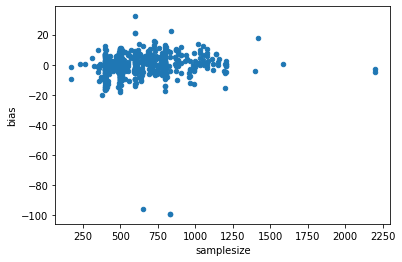

In [28]:
LiveTest.plot(x = 'samplesize', y='bias', kind = 'scatter')

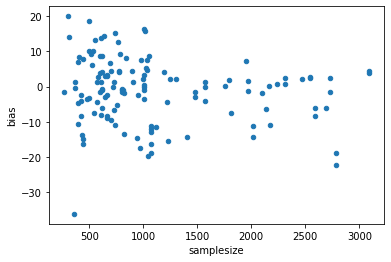

In [31]:
IVRTest.plot(x = 'samplesize', y='bias', kind = 'scatter')

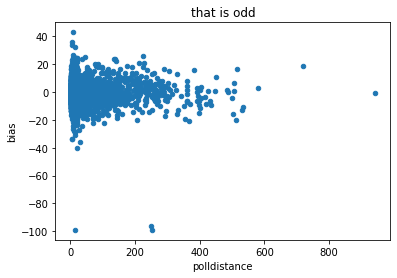

In [56]:
allPolls.plot(x = 'polldistance', y = 'bias', kind = 'scatter', title = 'that is odd')

In [65]:
pollTest = allPolls[allPolls['bias'] > -80]

In [66]:
pollTest = pollTest[pollTest['partisan_race'] == 1]

In [59]:
pollTest = pollTest.groupby('polldistance').mean()

In [62]:
allPolls.head()

Unnamed: 0    pollno               race  year location type_simple  \
0           0     52636  2018_House-G_WV-1  2018     WV-1     House-G   
1           1   5385987  2012_House-G_NM-2  2012     NM-2     House-G   
2           2  15380988     2016_Pres-R_VT  2016       VT      Pres-P   
3           3     56204  2018_House-G_NV-1  2018     NV-1     House-G   
4           4  15381069     2016_Pres-D_KS  2016       KS      Pres-P   

  type_detail                    pollster partisan    polldate  ...  \
0     House-G         Monmouth University      NaN   6/14/2018  ...   
1     House-G     Research & Polling Inc.      NaN  10/24/2012  ...   
2      Pres-R        Castleton University      NaN   2/10/2016  ...   
3     House-G             Emerson College      NaN  10/10/2018  ...   
4      Pres-D  Fort Hays State University      NaN   2/23/2016  ...   

   margin_actual  error   bias polldistance  rightcall  comment  methodology  \
0         -29.20  16.80 -16.80          145        NaN      NaN         Live   
1         -18.19   0.19   0.19           13        1.0      NaN         Live   
2           2.35  16.75    NaN           20        1.0      NaN         Live   
3          35.30   5.10  -5.10           27        NaN      NaN   IVR/Online   
4          35.50  45.50    NaN           11        0.0      NaN         Live   

  state  partisan_race      time_distance  
0    WV              1  145 days, 0:00:00  
1    NM              1   13 days, 0:00:00  
2    VT              0   20 days, 0:00:00  
3    NV              1   27 days, 0:00:00  
4    KS              0   11 days, 0:00:00  

[5 rows x 30 columns]

In [67]:
pollTest.head()

Unnamed: 0   pollno               race  year location type_simple  \
0           0    52636  2018_House-G_WV-1  2018     WV-1     House-G   
1           1  5385987  2012_House-G_NM-2  2012     NM-2     House-G   
3           3    56204  2018_House-G_NV-1  2018     NV-1     House-G   
5           5    52621      2018-Gov-G_PA  2018       PA       Gov-G   
6           6    56202  2018_House-G_UT-1  2018     UT-1     House-G   

  type_detail                     pollster partisan    polldate  ...  \
0     House-G          Monmouth University      NaN   6/14/2018  ...   
1     House-G      Research & Polling Inc.      NaN  10/24/2012  ...   
3     House-G              Emerson College      NaN  10/10/2018  ...   
5       Gov-G  Franklin & Marshall College      NaN   3/19/2018  ...   
6     House-G           University of Utah      NaN   10/3/2018  ...   

   margin_actual  error   bias polldistance  rightcall  comment  methodology  \
0         -29.20  16.80 -16.80          145        NaN      NaN         Live   
1         -18.19   0.19   0.19           13        1.0      NaN         Live   
3          35.30   5.10  -5.10           27        NaN      NaN   IVR/Online   
5          17.10   0.10  -0.10          232        NaN      NaN  Online/Live   
6         -36.70   4.70   4.70           34        NaN      NaN          NaN   

  state  partisan_race      time_distance  
0    WV              1  145 days, 0:00:00  
1    NM              1   13 days, 0:00:00  
3    NV              1   27 days, 0:00:00  
5    PA              1  232 days, 0:00:00  
6    UT              1   34 days, 0:00:00  

[5 rows x 30 columns]

In [36]:
largePolls = pollTest[pollTest['error'] > 5]

In [37]:
biasTest = pollTest['bias']

In [38]:
biasTest.std()

6.186463213809669

In [39]:
biasTest = biasTest.dropna()

In [46]:
biasTest = biasTest.tolist()

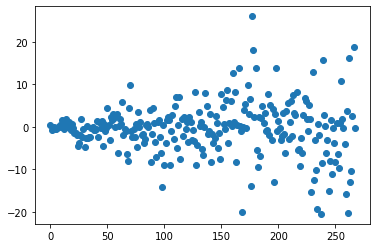

In [54]:
plt.scatter(x = range(len(biasTest)), y = biasTest)

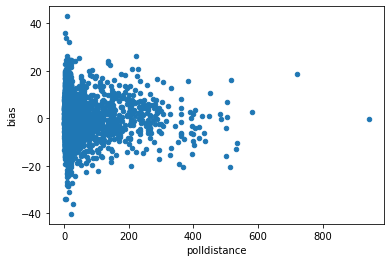

In [68]:
pollTest.plot(x='polldistance', y = 'bias', kind = 'scatter')

In [69]:
pollTest= pollTest[pollTest['pollster'] in largePolls]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

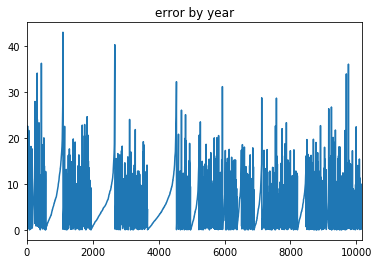

In [70]:
pollTest['error'].plot(title = 'error by year')

In [389]:
allPolls

pollno               race  year location type_simple type_detail  \
0         52636  2018_House-G_WV-1  2018     WV-1     House-G     House-G   
1       5385987  2012_House-G_NM-2  2012     NM-2     House-G     House-G   
2      15380988     2016_Pres-R_VT  2016       VT      Pres-P      Pres-R   
3         56204  2018_House-G_NV-1  2018     NV-1     House-G     House-G   
4      15381069     2016_Pres-D_KS  2016       KS      Pres-P      Pres-D   
...         ...                ...   ...      ...         ...         ...   
10154     76461    2016_House-G_US  2016       US     House-G     House-G   
10155     76043     2016_Pres-G_US  2016       US      Pres-G      Pres-G   
10156   5380935     2000_Pres-G_US  2000       US      Pres-G      Pres-G   
10157     55912         2018_Sen_G  2018       MO       Sen-G       Sen-G   
10158     53619  2018_House-G_NE-2  2018     NE-2     House-G     House-G   

                         pollster partisan    polldate  samplesize  ...  \
0             Monmouth University      NaN   6/14/2018        87.0  ...   
1         Research & Polling Inc.      NaN  10/24/2012       113.0  ...   
2            Castleton University      NaN   2/10/2016       115.0  ...   
3                 Emerson College      NaN  10/10/2018       121.0  ...   
4      Fort Hays State University      NaN   2/23/2016       123.0  ...   
...                           ...      ...         ...         ...  ...   
10154                SurveyMonkey      NaN   11/3/2016     67223.0  ...   
10155                SurveyMonkey      NaN   11/3/2016     70194.0  ...   
10156          Harris Interactive      NaN   11/2/2000    134000.0  ...   
10157       Global Strategy Group      NaN    4/9/2018         NaN  ...   
10158                        NRCC      REP   5/16/2018         NaN  ...   

      cand1_actual  cand2_actual margin_actual  error   bias  polldistance  \
0            35.40         64.60        -29.20  16.80 -16.80           145   
1            40.87         59.06        -18.19   0.19   0.19            13   
2            32.52         30.17          2.35  16.75    NaN            20   
3            66.20         30.90         35.30   5.10  -5.10            27   
4            67.75         32.25         35.50  45.50    NaN            11   
...            ...           ...           ...    ...    ...           ...   
10154        48.04         49.10         -1.07   6.07   6.07             5   
10155        48.02         45.93          2.09   4.41   4.41             5   
10156        48.38         47.87          0.51   1.51  -1.51             5   
10157        45.57         51.38         -5.81   7.81   7.81           211   
10158        49.00         51.00         -2.00   8.00  -8.00           174   

      rightcall                                            comment  \
0           NaN                                                NaN   
1           1.0                                                NaN   
2           1.0                                                NaN   
3           NaN                                                NaN   
4           0.0                                                NaN   
...         ...                                                ...   
10154       0.0                                                NaN   
10155       1.0  average of multiple versions or turnout models...   
10156       0.0    previously listed as Harris Interactive, online   
10157       NaN                                                NaN   
10158       NaN                                                NaN   

       methodology  state  
0             Live     WV  
1             Live     NM  
2             Live     VT  
3       IVR/Online     NV  
4             Live     KS  
...            ...    ...  
10154       Online     US  
10155       Online     US  
10156          NaN     US  
10157         Live     MO  
10158          NaN     NE  

[10159 rows x 27 columns]

C:\Users\marcu\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


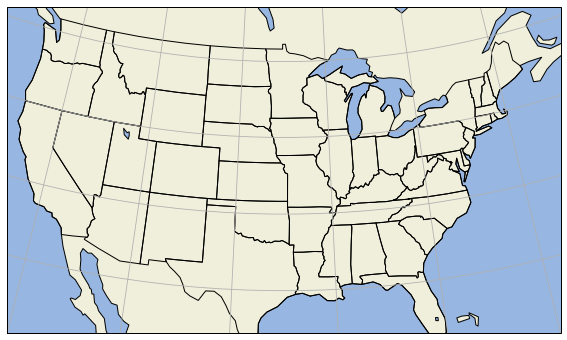

In [21]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.STATES)
ax.gridlines()

In [24]:
states = shpreader.Reader('countries_shapefile/ne_10m_admin_0_countries.shp')

In [26]:
us = [c for c in states.records()
          if c.attributes['CONTINENT'] == 'North America']

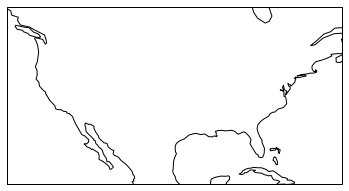

In [36]:
crs = ccrs.PlateCarree()
extent = [-130, -65, 20, 50]
def draw_us(ax):
    ax.set_extent(extent)
    ax.coastlines()
fig, ax = plt.subplots(
    1, 1, figsize=(6, 8),
    subplot_kw=dict(projection=crs))
draw_us(ax)

In [39]:
def choropleth(ax, attr, cmap_name):
    # We need to normalize the values before we can
    # use the colormap.
    values = [c.attributes[attr] for c in us]
    norm = Normalize(
        vmin=min(values), vmax=max(values))
    cmap = plt.cm.get_cmap(cmap_name)
    for c in us:
        v = c.attributes[attr]
        sp = ShapelyFeature(c.geometry, crs,
                            edgecolor='k',
                            facecolor=cmap(norm(v)))
        ax.add_feature(sp)

NameError: name 'Normalize' is not defined

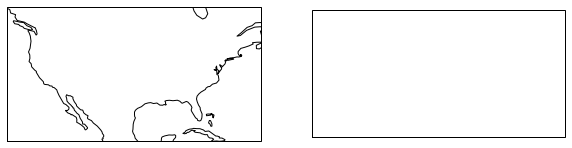

In [40]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(10, 16),
    subplot_kw=dict(projection=crs))
draw_us(ax1)
choropleth(ax1, 'POP_EST', 'Reds')
ax1.set_title('Population')

draw_us(ax2)
choropleth(ax2, 'GDP_MD_EST', 'Blues')
ax2.set_title('GDP')

In [148]:
#Geopandas attempt 2
#Credit to Marcelo Rovai for creating the geopandas tutorial I referenced to create this

In [149]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [150]:
shp_path = 'us_state_5m_shapefile/cb_2018_us_state_5m.shp'
sf = shp.Reader(shp_path)

In [151]:
len(sf.shapes())

56

In [152]:
sf.records()

[Record #0: ['31', '01779792', '0400000US31', '31', 'NE', 'Nebraska', '00', 198956658395, 1371829134],
 Record #1: ['53', '01779804', '0400000US53', '53', 'WA', 'Washington', '00', 172112588220, 12559278850],
 Record #2: ['35', '00897535', '0400000US35', '35', 'NM', 'New Mexico', '00', 314196306401, 728776523],
 Record #3: ['46', '01785534', '0400000US46', '46', 'SD', 'South Dakota', '00', 196346981786, 3382720225],
 Record #4: ['48', '01779801', '0400000US48', '48', 'TX', 'Texas', '00', 676653171537, 19006305260],
 Record #5: ['06', '01779778', '0400000US06', '06', 'CA', 'California', '00', 403503931312, 20463871877],
 Record #6: ['21', '01779786', '0400000US21', '21', 'KY', 'Kentucky', '00', 102279490672, 2375337755],
 Record #7: ['39', '01085497', '0400000US39', '39', 'OH', 'Ohio', '00', 105828882568, 10268850702],
 Record #8: ['01', '01779775', '0400000US01', '01', 'AL', 'Alabama', '00', 131174048583, 4593327154],
 Record #9: ['13', '01705317', '0400000US13', '13', 'GA', 'Georgia',

In [153]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [154]:
df=read_shapefile(sf)
df.shape

(56, 10)

In [156]:
df.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      31  01779792  0400000US31    31     NE      Nebraska   00   
1      53  01779804  0400000US53    53     WA    Washington   00   
2      35  00897535  0400000US35    35     NM    New Mexico   00   
3      46  01785534  0400000US46    46     SD  South Dakota   00   
4      48  01779801  0400000US48    48     TX         Texas   00   

          ALAND       AWATER  \
0  198956658395   1371829134   
1  172112588220  12559278850   
2  314196306401    728776523   
3  196346981786   3382720225   
4  676653171537  19006305260   

                                              coords  
0  [(-104.053514, 41.157257), (-104.052666, 41.27...  
1  [(-122.328343, 48.021335), (-122.321721, 48.01...  
2  [(-109.050173, 31.480003999999997), (-109.0498...  
3  [(-104.057698, 44.997431), (-104.0502099999999...  
4  [(-106.645479, 31.89867), (-106.64084, 31.9045...

In [157]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(-122.17731920965183, 47.544353068609546)

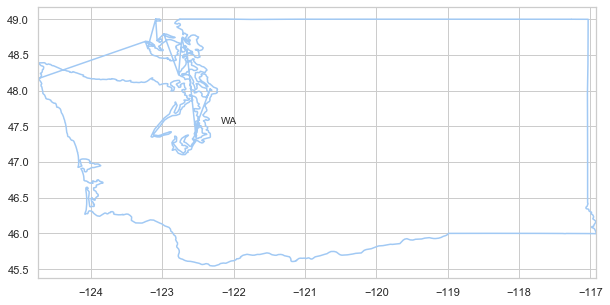

In [158]:
STUSPS = 'WA'
com_id = df[df.STUSPS == STUSPS].index.to_numpy()[0]
plot_shape(com_id, STUSPS)

In [159]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    count = 0
    to_remove = [27, 39, 47, 48, 49, 51, 55]
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        if count not in to_remove:
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            plt.plot(x, y, 'k')
        count += 1
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

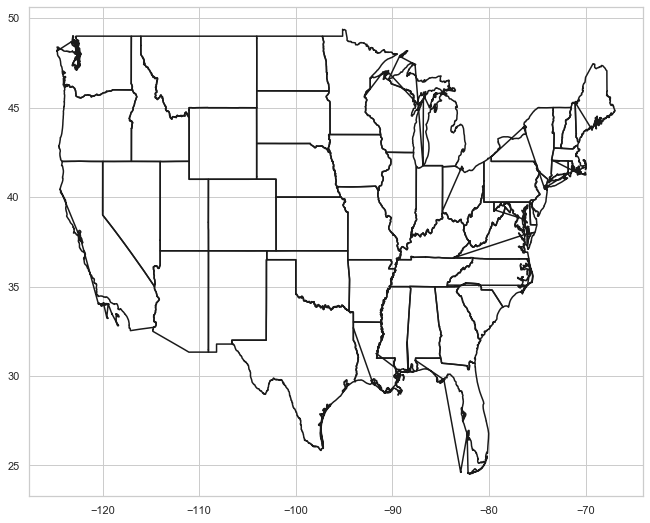

In [160]:
plot_map(sf)

In [177]:
STUSPS_id = ['OR', 'WA', 'ND', 'SD', 'MA']

In [178]:
def calc_color(data, color=None):
        if color == 1: 
            color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']
            colors = 'Purples'
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4', '#1d91c0','#225ea8','#253494']
            colors = 'YlGnBu'
        elif color == 3:
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']
            colors = 'Greys'
        elif color == 9:
            color_sq = ['#ff0000','#ff0000','#ff0000', '#ff0000','#ff0000','#ff0000']
        else:
            color_sq = ['#ffffd4','#fee391','#fec44f', '#fe9929','#d95f0e','#993404']
            colors = 'YlOrBr'
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [184]:
def plot_state_data(sf, title, STUSPS, data=None, color=None, print_id=False):
    '''
    Plot map with selected state abbreviations, using specific colors
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in STUSPS:
        STUSPS_id.append(df[df.STUSPS == i.upper()].index.get_values()[0])
    plot_multiple_states(
        sf, title, comuna_id, print_id, color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9)
    );

In [195]:
def plot_multiple_states(
    sf, title, STUSPS,  print_id, color_ton, bins, x_lim = None, y_lim = None, 
    figsize = (11,9)
):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')

    for id in STUSPS:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


1: 200 => 1399 
2: 1400 => 7998 
3: 7999 => 19999 
4: 20000 => 139998 
5: 139999 => 799998 
6: 799999 => 1999999 

   1   2   3   4   5   6


C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  # Remove the CWD from sys.path while we load stuff.


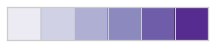

<Figure size 792x648 with 0 Axes>

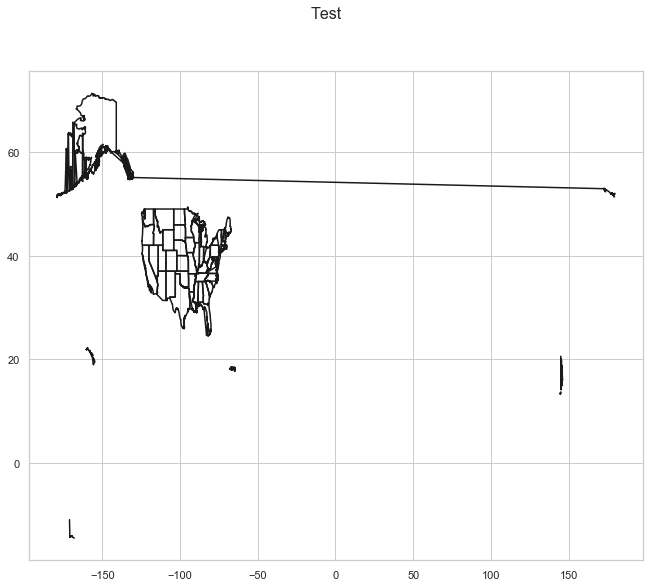

In [196]:
state_id = ['OR', 'WA', 'ND', 'SD', 'MA']
data = [200, 2000, 20000, 200000, 2000000]
print_id = True
color_pallete = 1
plot_state_data(sf, 'Test', state_id, data, color_pallete, print_id)

In [ ]:
mapping shape

In [13]:
allPolls.head()

Unnamed: 0    pollno               race  year location type_simple  \
0           0     52636  2018_House-G_WV-1  2018     WV-1     House-G   
1           1   5385987  2012_House-G_NM-2  2012     NM-2     House-G   
2           2  15380988     2016_Pres-R_VT  2016       VT      Pres-P   
3           3     56204  2018_House-G_NV-1  2018     NV-1     House-G   
4           4  15381069     2016_Pres-D_KS  2016       KS      Pres-P   

  type_detail                    pollster partisan    polldate  ...  \
0     House-G         Monmouth University      NaN   6/14/2018  ...   
1     House-G     Research & Polling Inc.      NaN  10/24/2012  ...   
2      Pres-R        Castleton University      NaN   2/10/2016  ...   
3     House-G             Emerson College      NaN  10/10/2018  ...   
4      Pres-D  Fort Hays State University      NaN   2/23/2016  ...   

   cand2_actual margin_actual  error   bias  polldistance  rightcall  comment  \
0         64.60        -29.20  16.80 -16.80           145        NaN      NaN   
1         59.06        -18.19   0.19   0.19            13        1.0      NaN   
2         30.17          2.35  16.75    NaN            20        1.0      NaN   
3         30.90         35.30   5.10  -5.10            27        NaN      NaN   
4         32.25         35.50  45.50    NaN            11        0.0      NaN   

  methodology  state  partisan_race  
0        Live     WV              1  
1        Live     NM              1  
2        Live     VT              0  
3  IVR/Online     NV              1  
4        Live     KS              0  

[5 rows x 29 columns]

In [137]:
y = allPolls['error']

In [138]:
x = allPolls['samplesize']

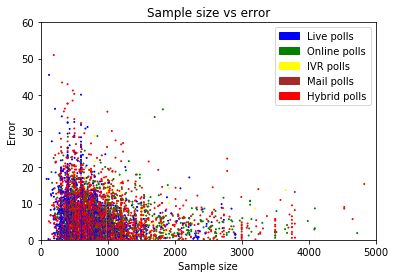

In [143]:
errorPlot = plt.scatter(x, y, c = color(allPolls.simplemethod), s = 1)
plt.xlim((0, 5000))
plt.ylim((0, 60))
plt.xlabel('Sample size')
plt.ylabel('Error')
plt.title('Sample size vs error')
blue_patch = mpatches.Patch(color='blue', label='Live polls')
red_patch = mpatches.Patch(color='red', label='Hybrid polls')
grey_patch = mpatches.Patch(color='grey', label='Nan polls')
green_patch = mpatches.Patch(color='green', label='Online polls')
yellow_patch = mpatches.Patch(color='yellow', label='IVR polls')
brown_patch = mpatches.Patch(color='brown', label='Mail polls')
plt.legend(handles=[blue_patch, green_patch, yellow_patch, brown_patch, red_patch])

In [74]:
allPolls['simplemethod'] = allPolls['methodology']
allPolls['has_IVR'] = allPolls['partisan_race']
allPolls['has_Mail'] = allPolls['partisan_race']
allPolls['has_Online'] = allPolls['partisan_race']
allPolls['has_Live'] = allPolls['partisan_race']

In [106]:
types = ['IVR', 'Live', 'Mail', 'Online', 'Nan']
for index in range(len(allPolls)):
    if allPolls['simplemethod'][index] == 'Live Phone':
        allPolls['simplemethod'][index] = 'Live'
    elif allPolls['simplemethod'][index] == 'Live*':
        allPolls['simplemethod'][index] = 'Live'
    elif allPolls['simplemethod'][index] == 'Landline':
        allPolls['simplemethod'][index] = 'Live'
    elif allPolls['simplemethod'][index] == 'Automated Phone':
        allPolls['simplemethod'][index] = 'IVR'

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users

In [108]:
for index in range(len(allPolls)):
    if allPolls['simplemethod'][index] not in types:
        allPolls['simplemethod'][index] = 'Hybrid'

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
for index in range(len(allPolls)):
    if allPolls['methodology'][index] == allPolls['methodology'][index]:
        if 'IVR' in allPolls['methodology'][index]:
            allPolls['has_IVR'][index] = 1
        else:
            allPolls['has_IVR'][index] = 0
        if 'Online' in allPolls['methodology'][index]:
            allPolls['has_Online'][index] = 1
        else:
            allPolls['has_Online'][index] = 0
        if 'Mail' in allPolls['methodology'][index]:
            allPolls['has_Mail'][index] = 1
        else:
            allPolls['has_Mail'][index] = 0
        if 'Live' in allPolls['methodology'][index]:
            allPolls['has_Live'][index] = 1
        else:
            allPolls['has_Live'][index] = 0
            print('live_0')

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\marcu\Anaconda3\lib\site-packages\i

live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0

live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0

live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0
live_0

In [45]:
def color(data):
    return data.map({'Live': 'blue', 'Online': 'green', 
                     'IVR': 'yellow', 'Mail': 'brown', 
                     'Hybrid': 'red', 'Nan': 'grey'})

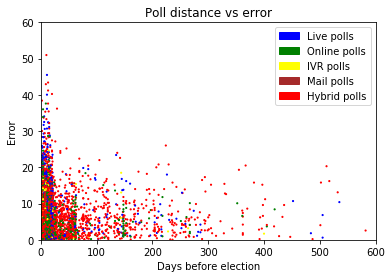

In [134]:
y = allPolls['error']
x = allPolls['polldistance']
errorPlot = plt.scatter(x, y, c = color(allPolls.simplemethod), s = 1.3)
plt.xlabel('Days before election')
plt.ylabel('Error')
plt.ylim((0, 60))
plt.xlim((0, 600))
plt.title('Poll distance vs error')
blue_patch = mpatches.Patch(color='blue', label='Live polls')
red_patch = mpatches.Patch(color='red', label='Hybrid polls')
grey_patch = mpatches.Patch(color='grey', label='Nan polls')
green_patch = mpatches.Patch(color='green', label='Online polls')
yellow_patch = mpatches.Patch(color='yellow', label='IVR polls')
brown_patch = mpatches.Patch(color='brown', label='Mail polls')
plt.legend(handles=[blue_patch, green_patch, yellow_patch, brown_patch, red_patch])

In [75]:
partisan_polls = allPolls[allPolls['partisan_race'] == 1]

In [152]:
datatypes = partisan_polls.groupby('simplemethod').mean()

In [63]:
datatypes['error'], datatypes['bias']

(simplemethod
 Hybrid    5.431638
 IVR       6.579789
 Live      5.529905
 Mail      4.896500
 Online    5.396211
 Name: error, dtype: float64, simplemethod
 Hybrid   -0.091210
 IVR      -2.840376
 Live     -0.042588
 Mail      3.567059
 Online    0.974196
 Name: bias, dtype: float64)

Text(0.5, 1.0, 'Mean error by poll type')

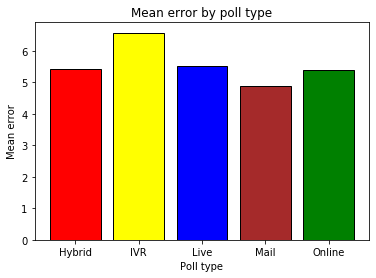

In [69]:
errortype = plt.bar(['Hybrid', 'IVR', 'Live', 'Mail', 'Online'], height = datatypes['error'],
                   color = ['red', 'yellow', 'blue', 'brown', 'green'], edgecolor = 'black')
plt.xlabel('Poll type')
plt.ylabel('Mean error')
plt.title('Mean error by poll type')

In [116]:
allPolls[allPolls['has_Live'] == 0]

Empty DataFrame
Columns: [Unnamed: 0, pollno, race, year, location, type_simple, type_detail, pollster, partisan, polldate, samplesize, cand1_name, cand1_pct, cand2_name, cand2_pct, cand3_pct, margin_poll, electiondate, cand1_actual, cand2_actual, margin_actual, error, bias, polldistance, rightcall, comment, methodology, state, partisan_race, simplemethod, has_IVR, has_Mail, has_Online, has_Live]
Index: []

[0 rows x 34 columns]

In [125]:
IVR_error = allPolls[allPolls['has_IVR'] == 1]
Online_error = allPolls[allPolls['has_Online'] == 1]
Live_error = allPolls[allPolls['has_Live'] == 1]
Mail_error = allPolls[allPolls['has_Mail'] == 1]

In [127]:
IVR_error = np.mean(IVR_error['error'])
Online_error = np.mean(Online_error['error'])
Live_error = np.mean(Live_error['error'])
Mail_error = np.mean(Mail_error['error'])

Text(0.5, 1.0, 'Mean error by poll type')

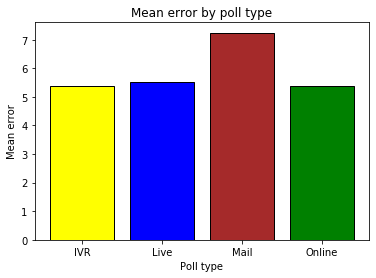

In [129]:
betterError = plt.bar(['Hybrid', 'IVR', 'Live', 'Mail', 'Online'], 
                      height = datatypes['error'],
                      color = ['red', 'yellow', 'blue', 'brown', 'green'], edgecolor = 'black')
plt.xlabel('Poll type')
plt.ylabel('Mean error')
plt.title('Mean error by poll type')

Text(0.5, 1.0, 'Mean bias by poll type')

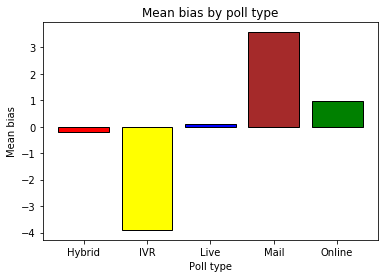

In [153]:
errortype = plt.bar(['Hybrid', 'IVR', 'Live', 'Mail', 'Online'], height = datatypes['bias'],
                   color = ['red', 'yellow', 'blue', 'brown', 'green'], edgecolor = 'black')
plt.xlabel('Poll type')
plt.ylabel('Mean bias')
plt.title('Mean bias by poll type')

In [193]:
pollsters = allPolls.groupby('pollster').std().sort_values('error')
pollsters = pollsters['error']
pollsters = pollsters.dropna()

AttributeError: module 'matplotlib.pyplot' has no attribute 'setxticklabels'

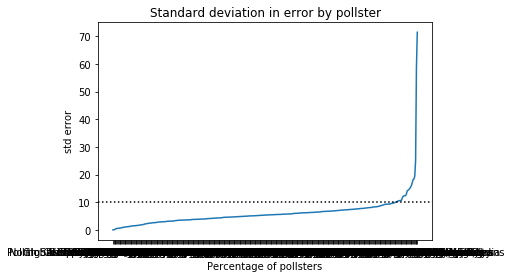

In [209]:
pollster_error = plt.plot(pollsters)
plt.xlabel('Percentage of pollsters')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('std error')
plt.axhline(y=10, color = 'black', linestyle = ':')
plt.title('Standard deviation in error by pollster')

In [175]:
len(pollsters['error'] >= 10)

485

In [195]:
len(pollsters)

364

In [201]:
pollsters[336]

9.800499987245548

In [189]:
376/390

0.9641025641025641

In [202]:
336/364

0.9230769230769231

Text(0, 0.5, 'sample size')

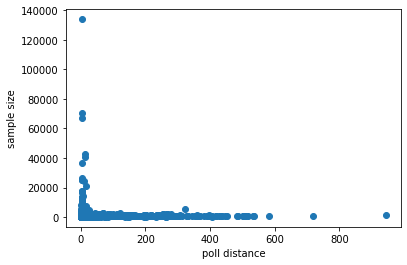

In [208]:
plt.scatter(allPolls['polldistance'], allPolls['samplesize'])
plt.xlabel('poll distance')
plt.ylabel('sample size')

In [210]:
sns.set(style = 'ticks', color_codes = True)

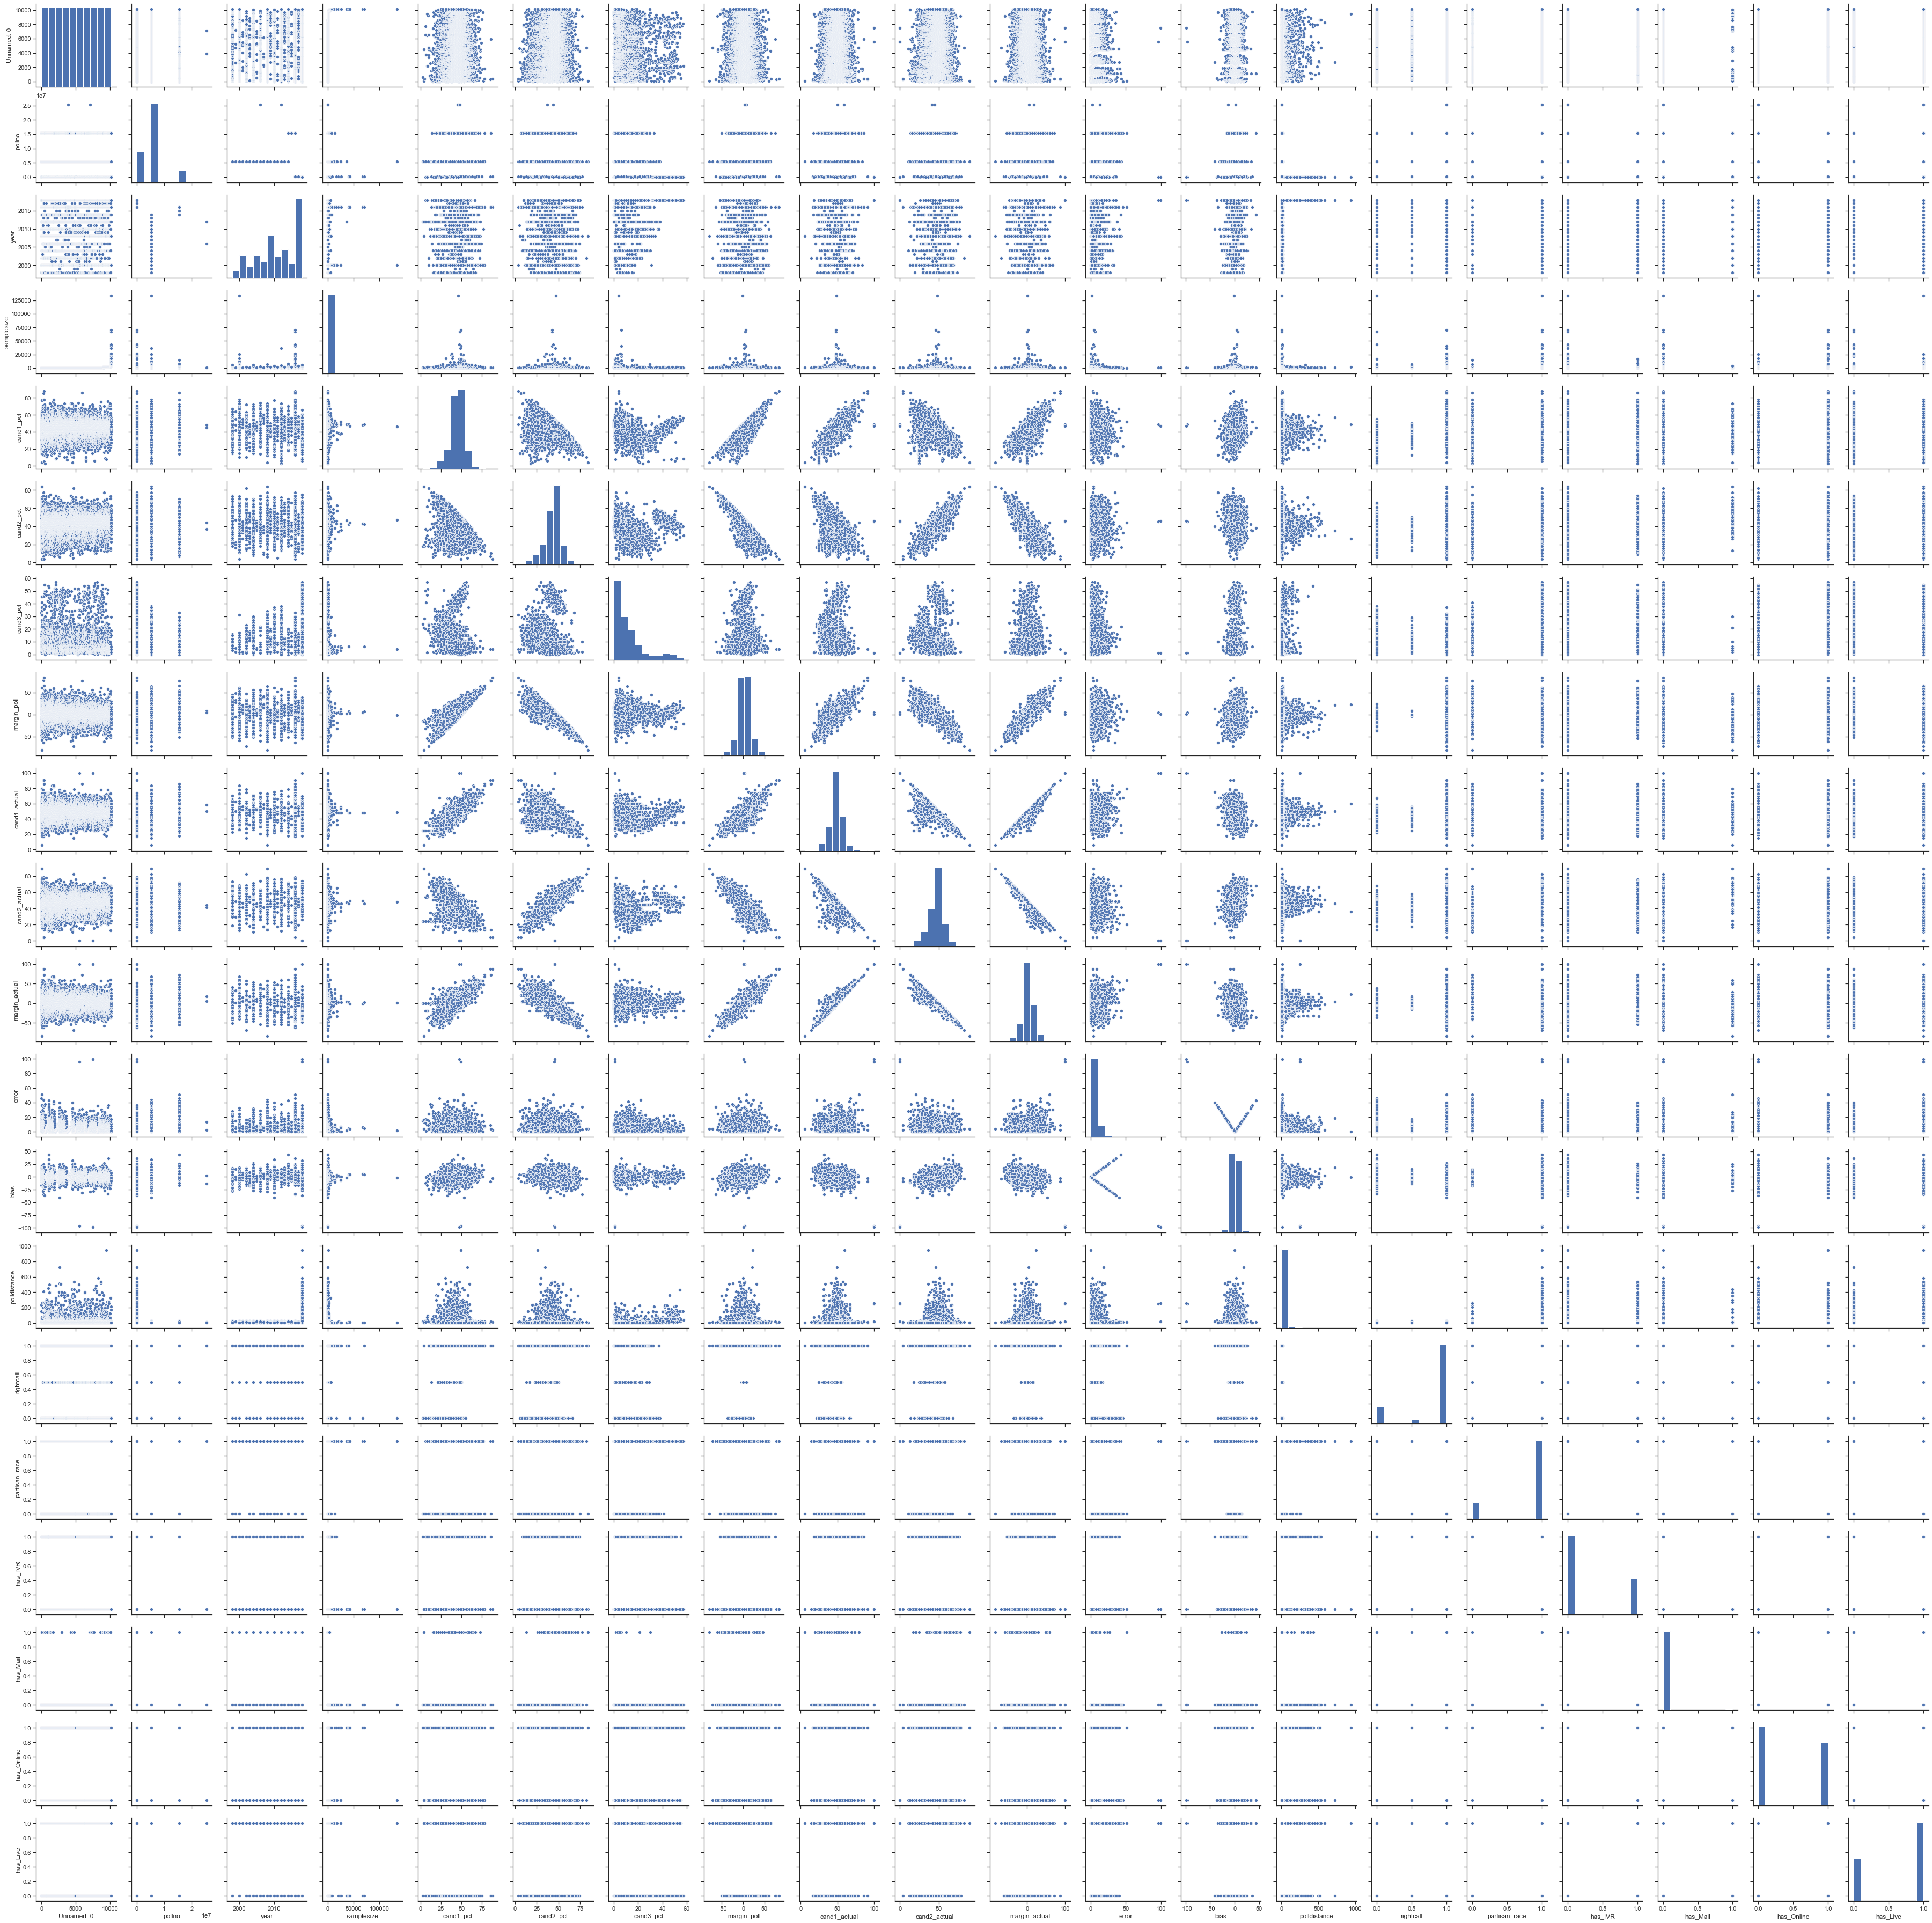

In [212]:
test = sns.pairplot(allPolls)

In [214]:
for col in allPolls.columns:
    print(col)

Unnamed: 0
pollno
race
year
location
type_simple
type_detail
pollster
partisan
polldate
samplesize
cand1_name
cand1_pct
cand2_name
cand2_pct
cand3_pct
margin_poll
electiondate
cand1_actual
cand2_actual
margin_actual
error
bias
polldistance
rightcall
comment
methodology
state
partisan_race
simplemethod
has_IVR
has_Mail
has_Online
has_Live


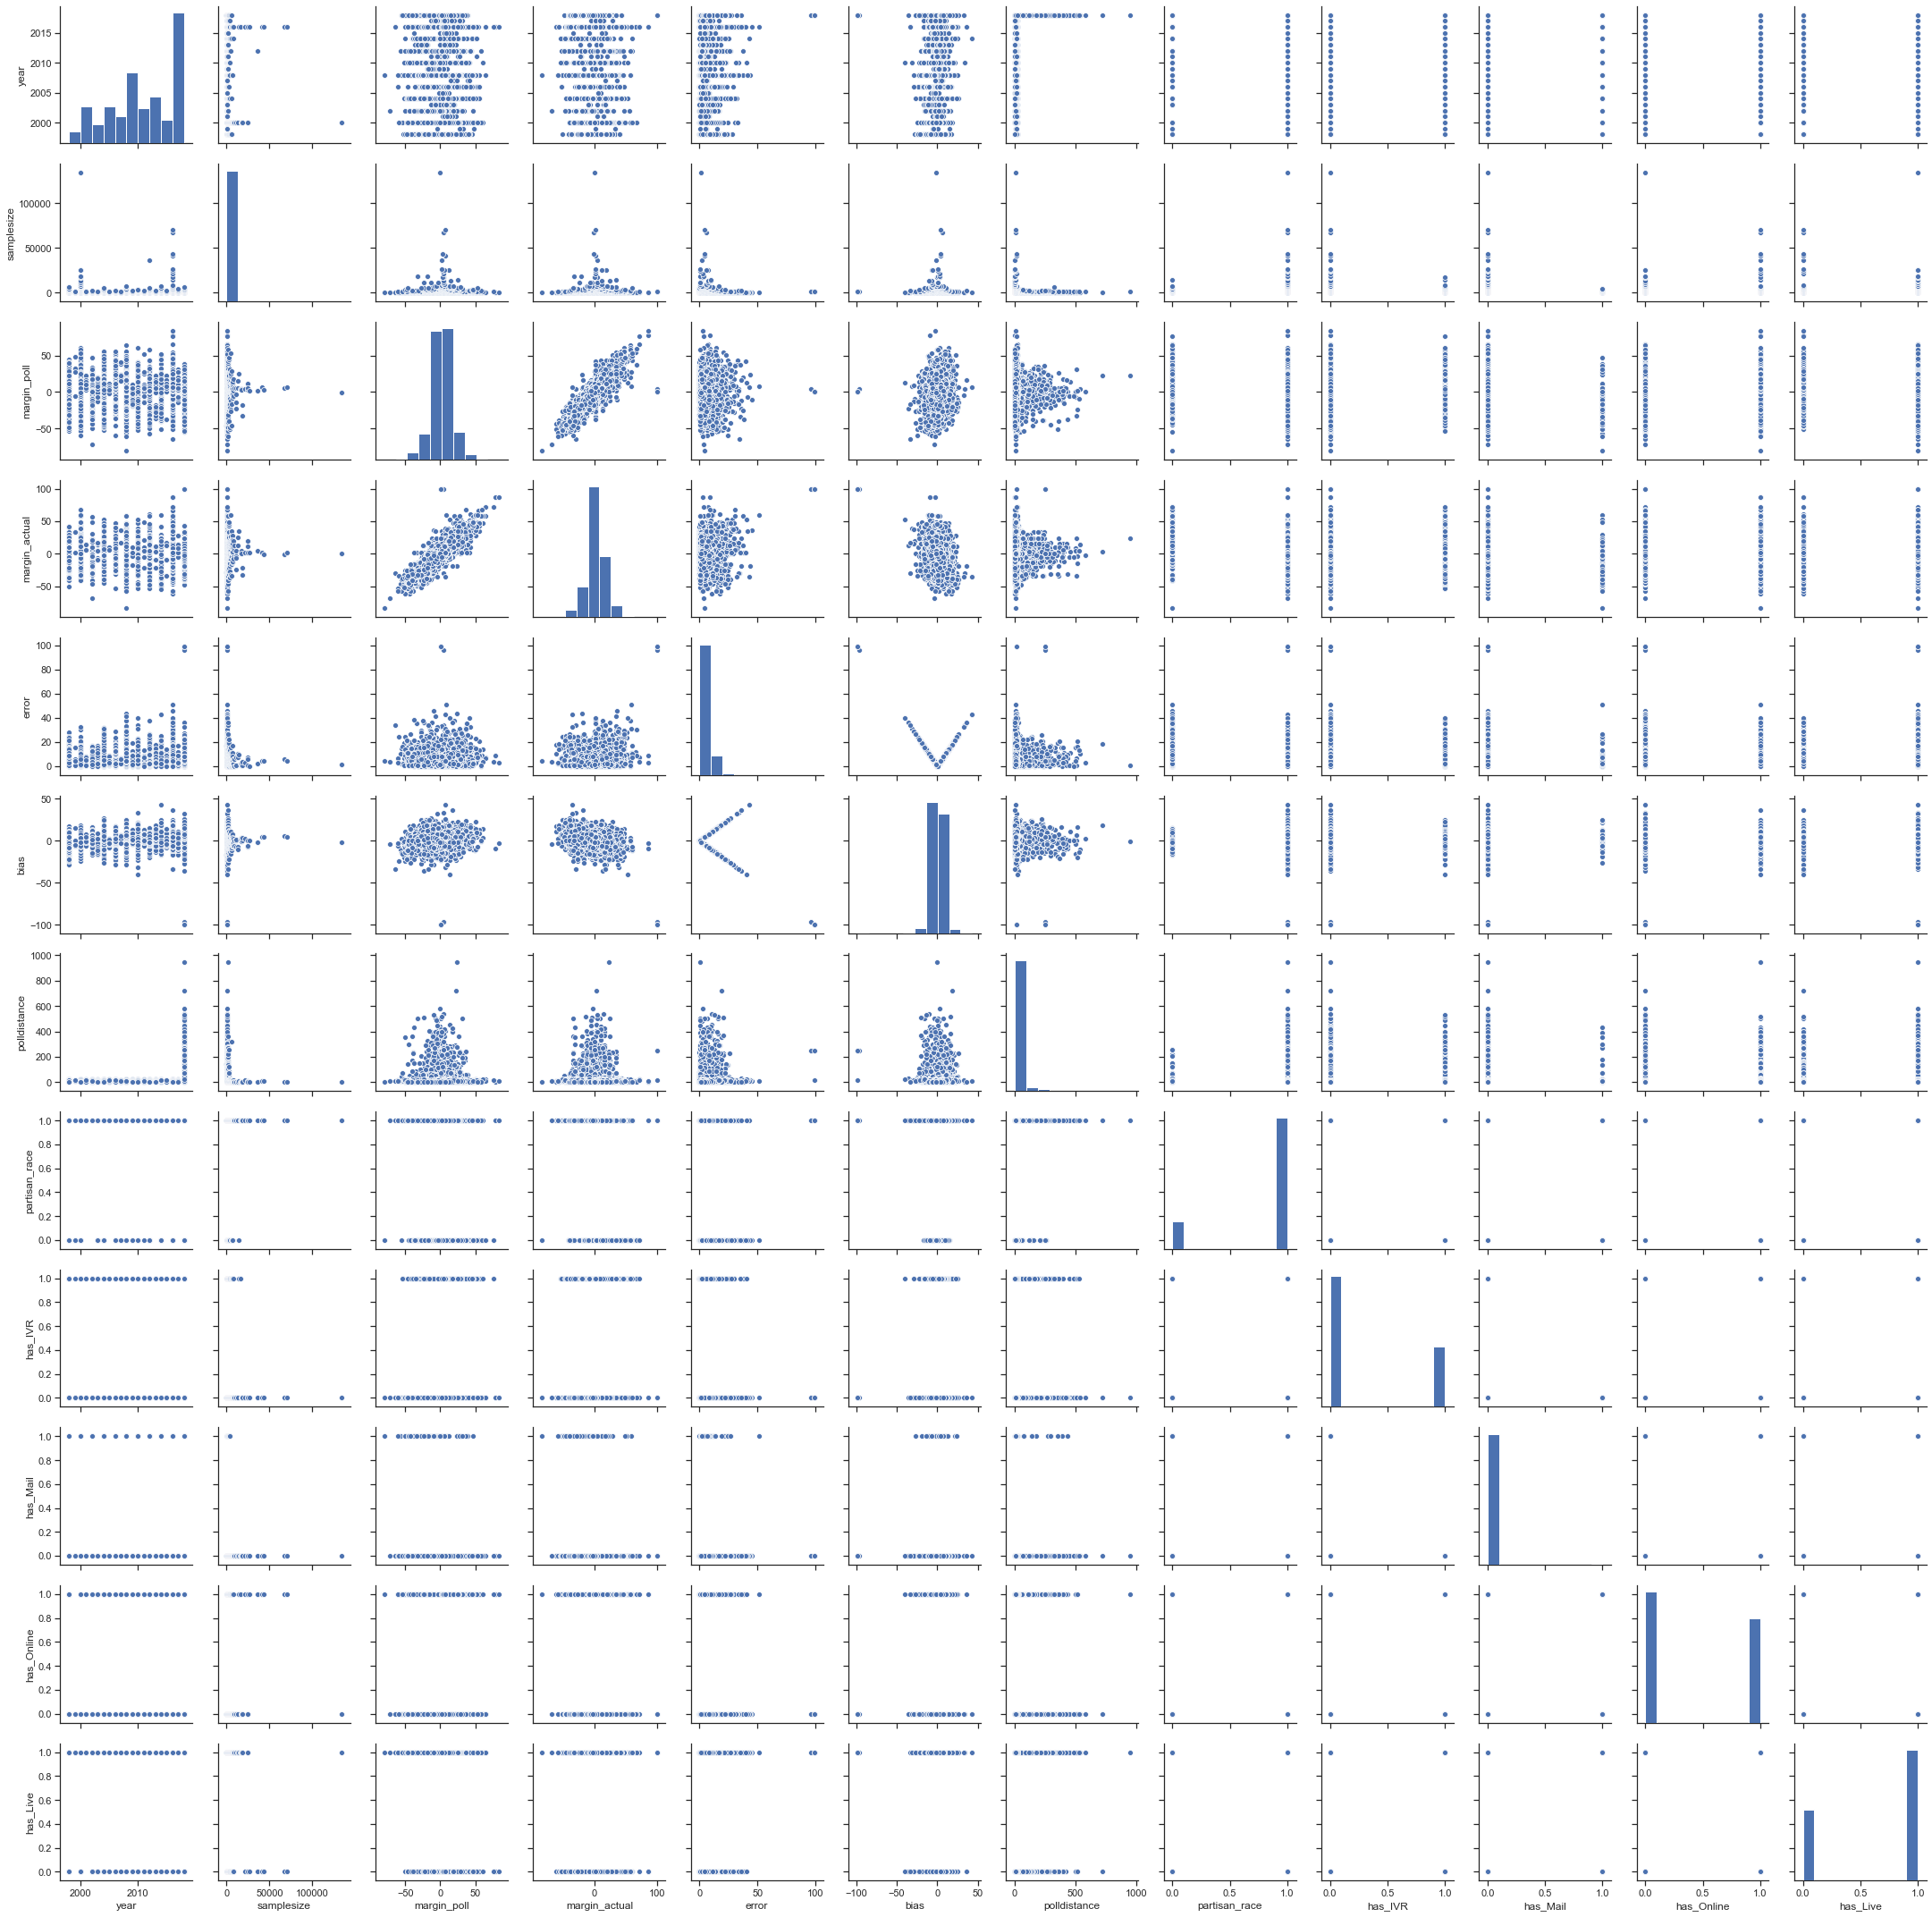

In [217]:
test_compact = sns.pairplot(allPolls, vars = ['year', 'samplesize', 'margin_poll', 'margin_actual', 'error', 'bias', 'polldistance', 'partisan_race', 'has_IVR', 'has_Mail', 'has_Online', 'has_Live'])

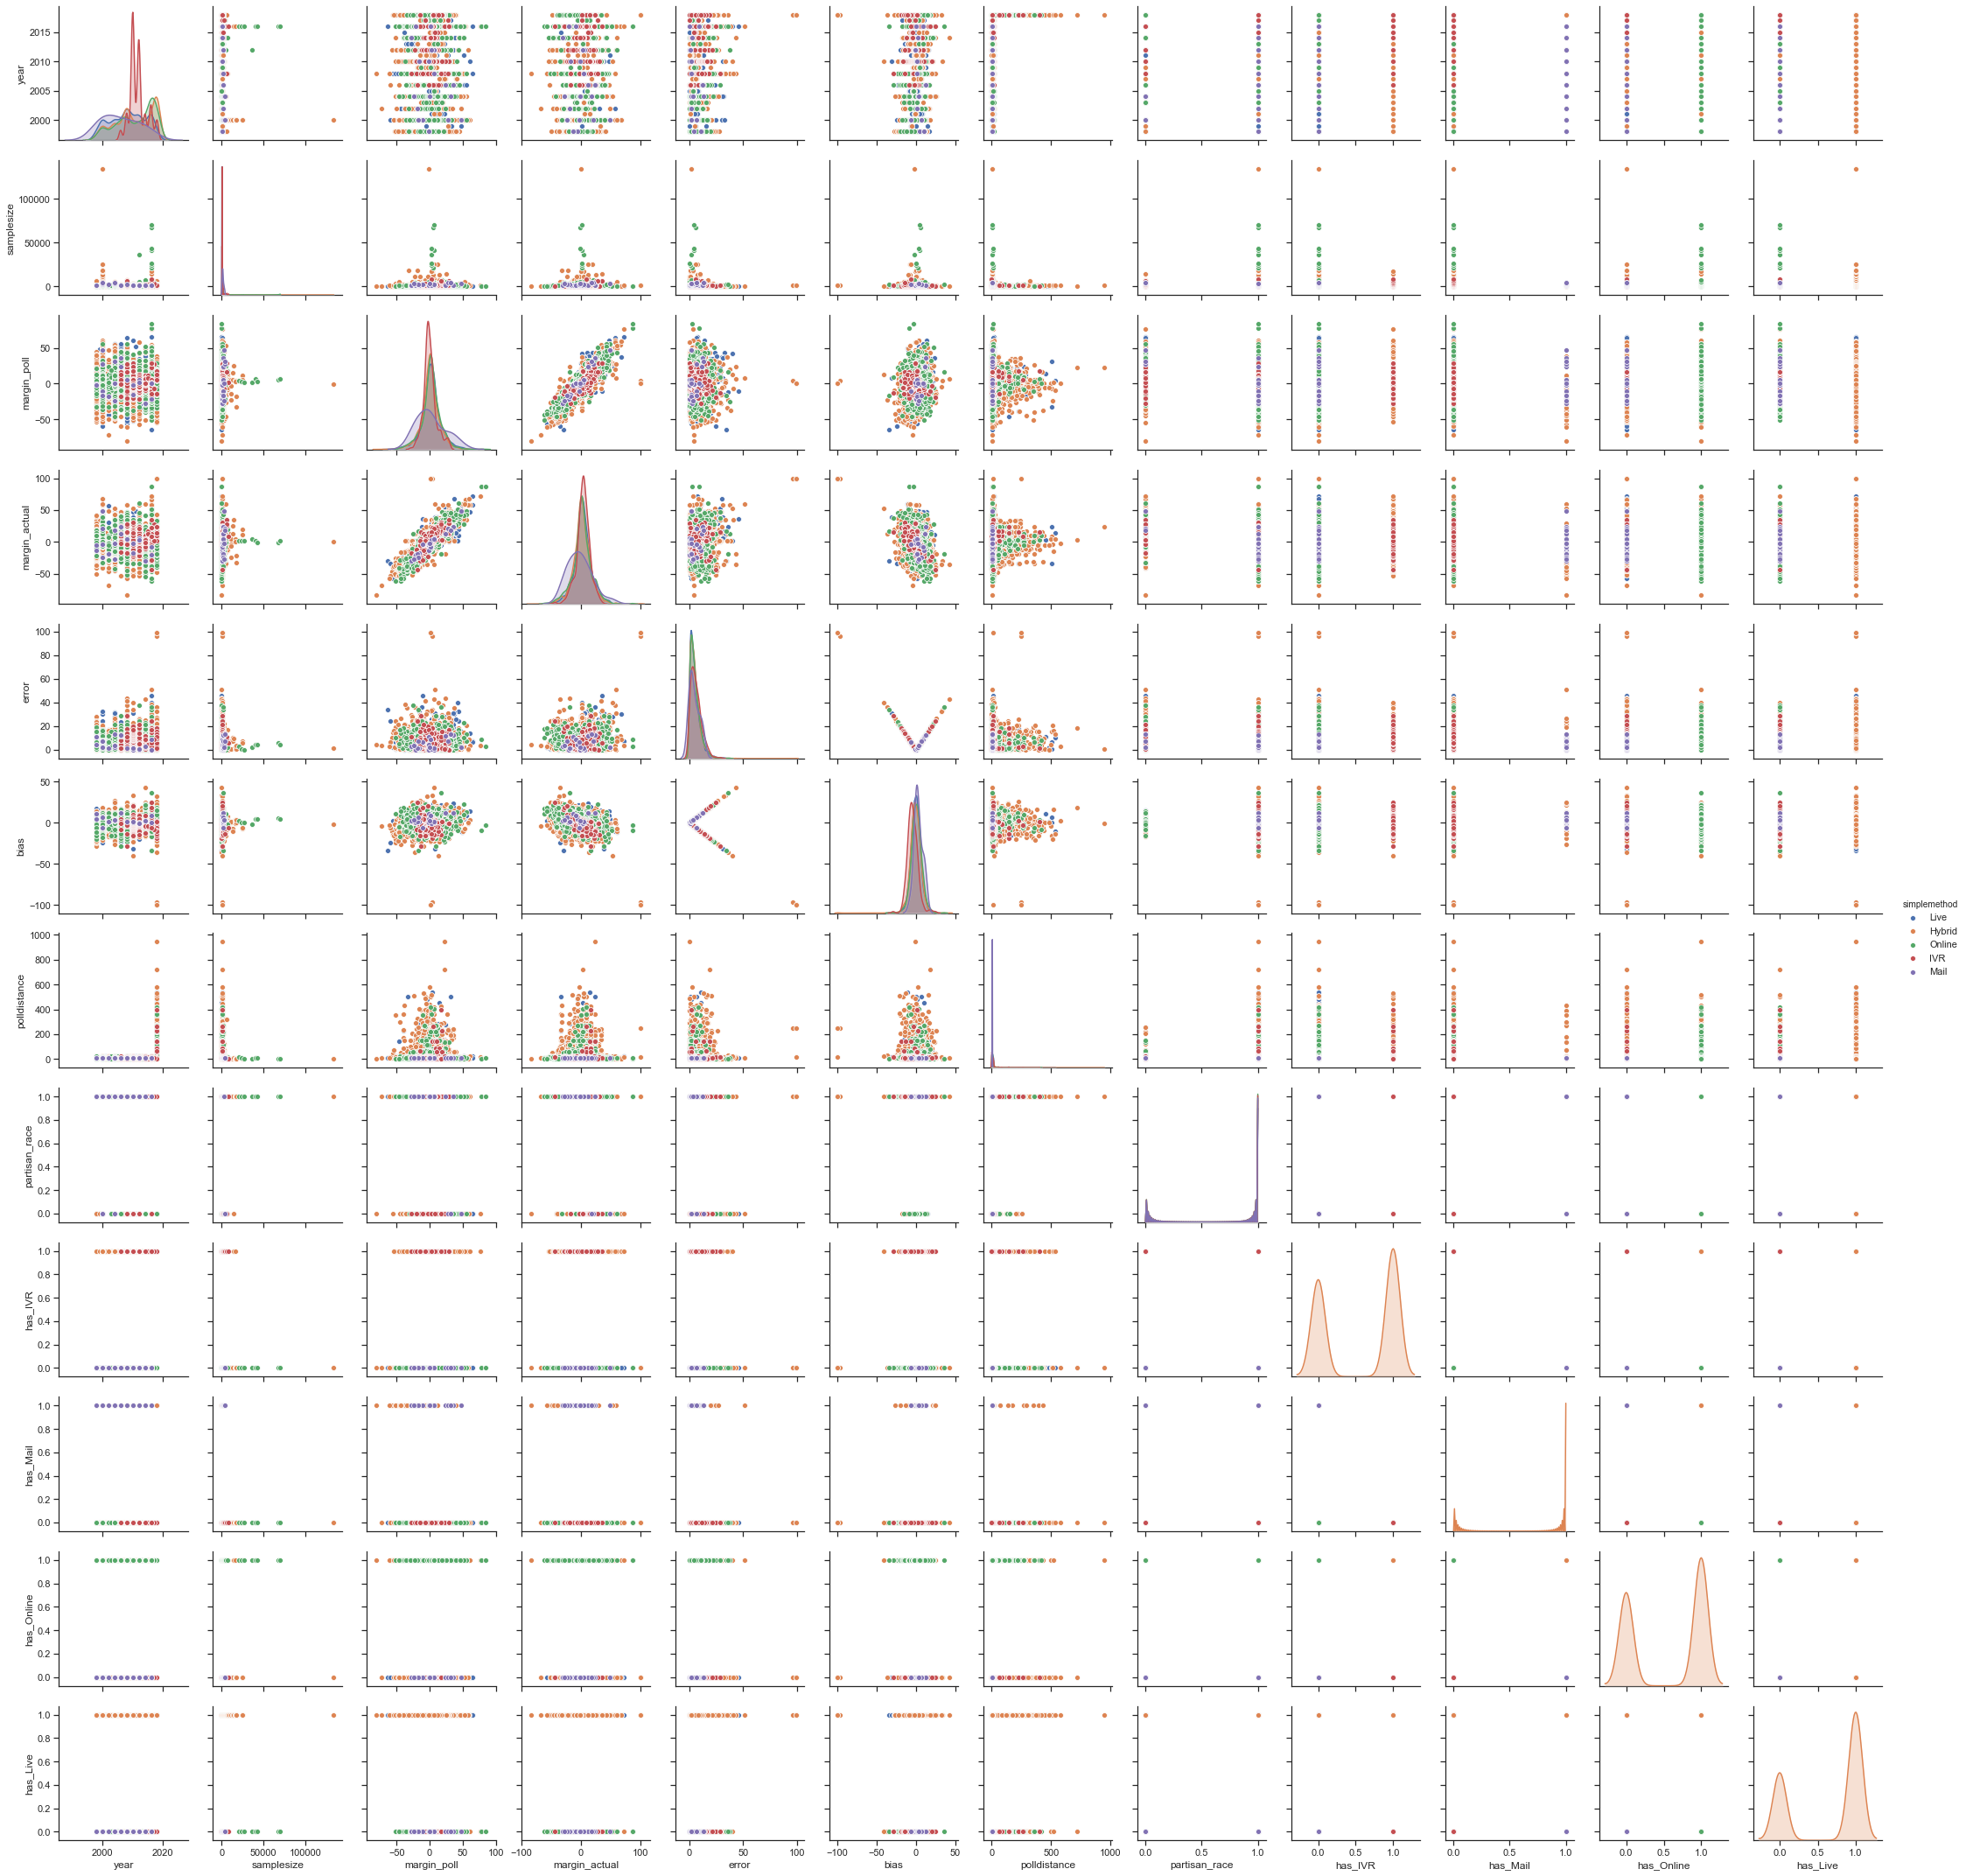

In [220]:
test_compact = sns.pairplot(allPolls, vars = ['year', 'samplesize', 'margin_poll', 'margin_actual', 'error', 'bias', 'polldistance', 'partisan_race', 'has_IVR', 'has_Mail', 'has_Online', 'has_Live'], hue = 'simplemethod')

C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\no

C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:48

C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:48

C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\no

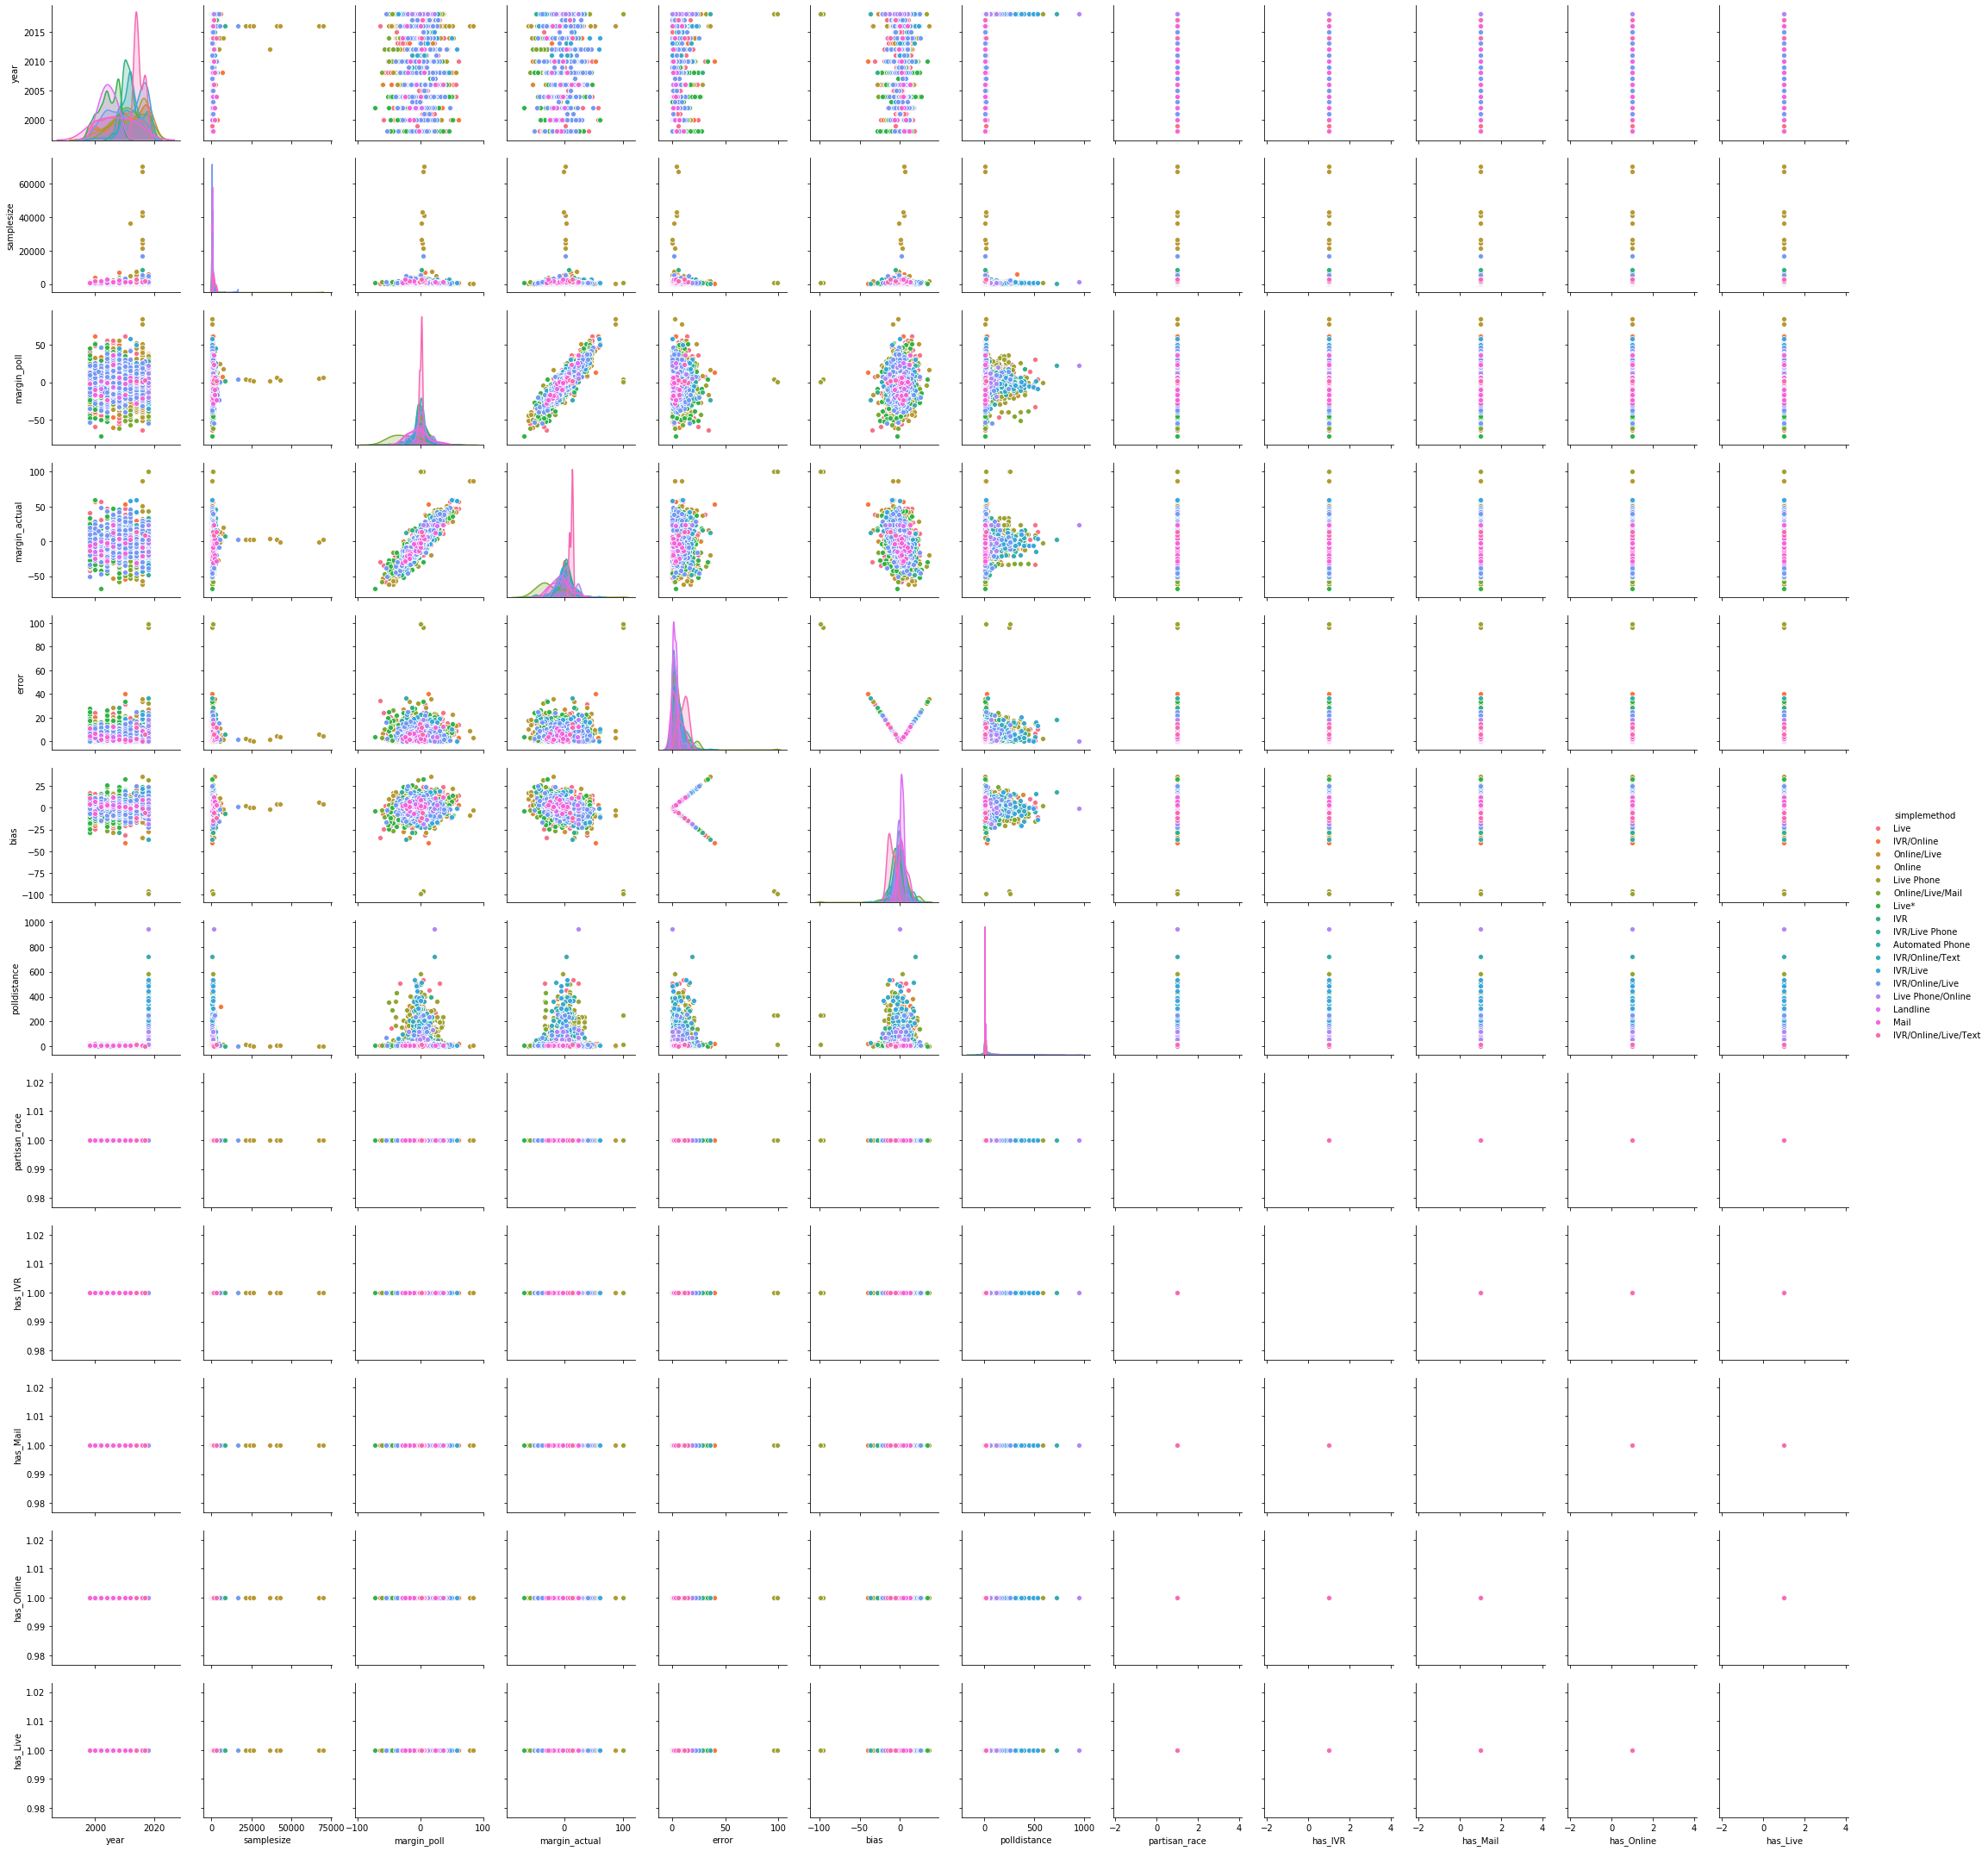

In [77]:
partisan_compact = sns.pairplot(partisan_polls, vars = ['year', 'samplesize', 'margin_poll', 'margin_actual', 'error', 'bias', 'polldistance', 'partisan_race', 'has_IVR', 'has_Mail', 'has_Online', 'has_Live'], hue = 'simplemethod')

In [104]:
testx = [0, 1, 2, 3, 4, 5]
testy = [0, 1, 2, 3, 4, 5]
ones = [0, 2, 4, 6, 8, 10]
tens = [0, 20, 40, 60, 80, 100]
decimals = [0, .2, .4, .6, 0.8, 1]

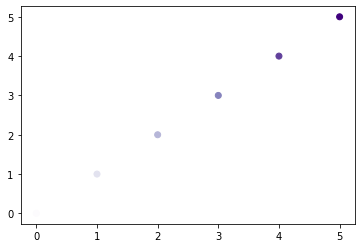

In [107]:
plt.scatter(x = testx, y = testy, c = decimals, cmap = 'Purples')

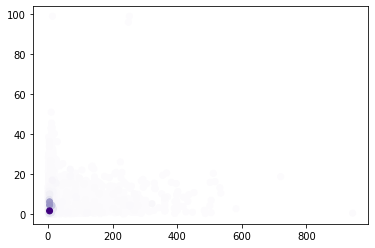

In [99]:
plt.scatter(x = allPolls['polldistance'], y = allPolls['error'], 
            c = (allPolls['samplesize'] / 10000000), cmap = 'Purples')

In [5]:
ctest = allPolls[allPolls['samplesize'] <= 5000]
ctest = ctest[ctest['error'] < 90]

Text(0.5, 1.0, 'Poll distance, error, and sample size')

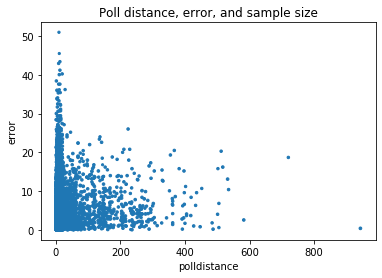

In [7]:
plt.scatter(x = ctest['polldistance'], y = ctest['error'], 
            c = np.log(ctest['samplesize']))
plt.xlabel('polldistance')
plt.ylabel('error')
plt.title('Poll distance, error, and sample size')

In [18]:
highTest = ctest[ctest['error'] > 15]
lowTest = ctest[ctest['error'] < 15]
farTest = ctest[ctest['polldistance'] > 50]
closeTest = ctest[ctest['polldistance'] < 50]

In [16]:
np.mean(highTest.samplesize)

613.8692946058092

In [17]:
np.mean(lowTest.samplesize)

766.3172255780046

In [19]:
np.mean(closeTest.samplesize)

761.8638462364437

In [20]:
np.mean(farTest.samplesize)

727.92